# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

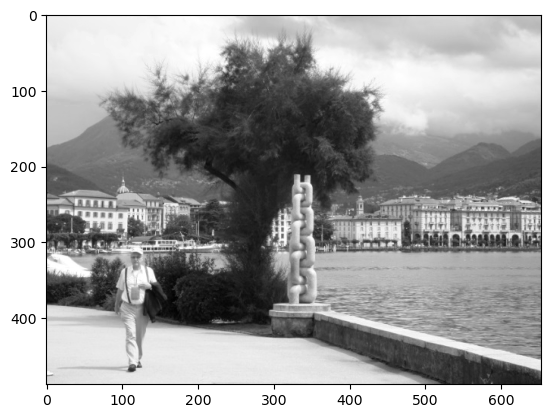

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

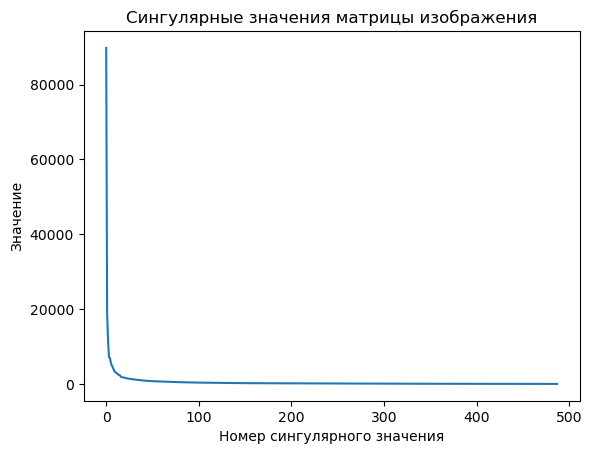

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(S)
plt.title('Сингулярные значения матрицы изображения')
plt.xlabel('Номер сингулярного значения')
plt.ylabel('Значение')
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

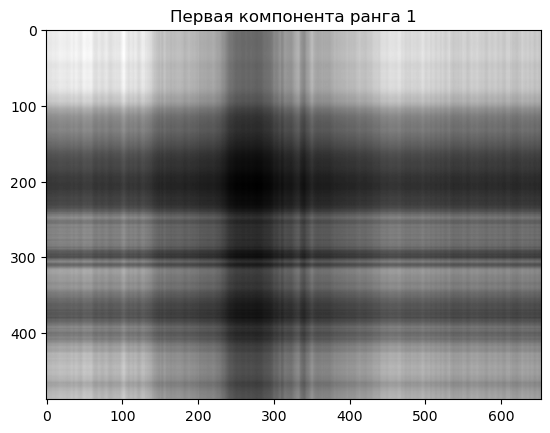

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
first_component = U[:, :1] @ np.diag(S[:1]) @ VT[:1, :]

plt.imshow(first_component, cmap='gray')
plt.title('Первая компонента ранга 1')
plt.show()

#Как я прочитал, первая компонента ранга 1 обычно захватывает наиболее доминирующую информацию об изображении,
#часто связанную с общим освещением и контрастом. Поэтому можно ожидать увидеть размытое изображение, где яркие
#области исходного изображения будут светлыми, а темные - темными.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

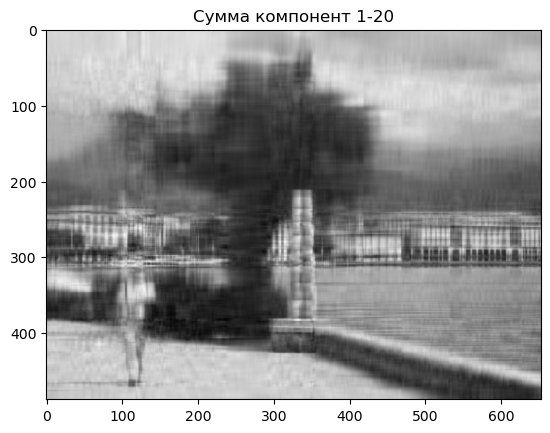

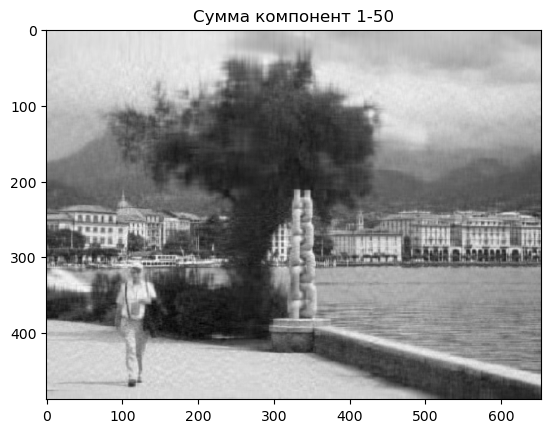

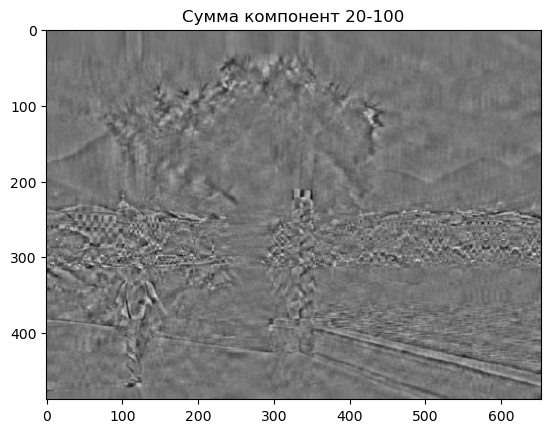

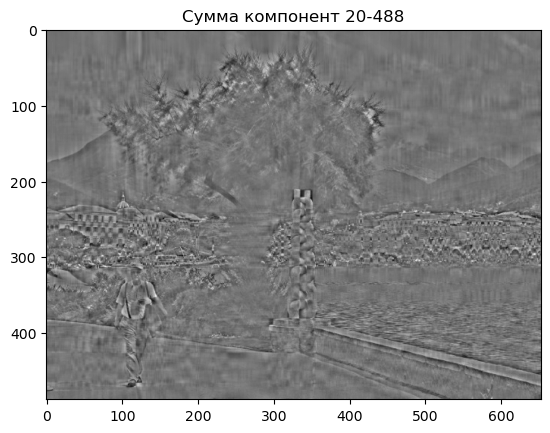

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
component_ranges = [(1, 20), (1, 50), (20, 100), (20, len(S))]

for start, end in component_ranges:
    components_sum = U[:, :end] @ np.diag(S[:end]) @ VT[:end, :]
    if start > 1:
        components_sum -= U[:, :start-1] @ np.diag(S[:start-1]) @ VT[:start-1, :]

    plt.imshow(components_sum, cmap='gray')
    plt.title(f'Сумма компонент {start}-{end}')
    plt.show()
    
#Вывод:

#Компоненты 1-20: Эти компоненты, как правило, содержат информацию о самых крупных и общих чертах изображения, таких как форма,
#освещение и общие области теней. Изображение, восстановленное с использованием только этих компонент, будет размытым и с низкой
#детализацией.

#Компоненты 1-50: Добавление следующих компонент (21-50) внесет больше деталей и четкости. Изображение станет более узнаваемым,
#но все еще может иметь некоторую размытость в областях с мелкими деталями.

#Компоненты 20-100: Эти компоненты в основном отвечают за детали изображения. При их суммировании мы увидим, как к изображению,
#состоящему из первых 20 компонент, добавляются более мелкие детали.

#Компоненты 20-последняя: Сумма всех компонент, начиная с 20-й, покажет, насколько сильно меняется изображение при добавлении
#самых последних, высокочастотных компонент. Эти компоненты обычно отвечают за самые мелкие детали, текстуры и шум.


**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

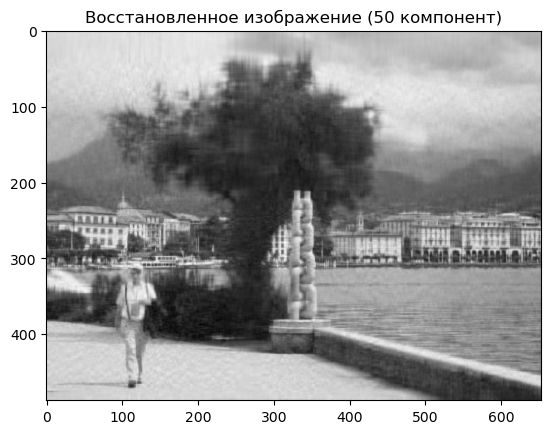

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
optimal_components = 50  # выбрано 50 компонент 

reconstructed_img_optimal = U[:, :optimal_components] @ np.diag(S[:optimal_components]) @ VT[:optimal_components, :]
plt.imshow(reconstructed_img_optimal, cmap='gray')
plt.title(f'Восстановленное изображение ({optimal_components} компонент)')
plt.show()

#Почему примерно 50 подойдет:

#1.Резкое падение ошибки: На графике видно, что при использовании примерно 50 компонент
#ошибка становится достаточно мала.

#2.Плато на графике: Дальнейшее увеличение количества компонент свыше 50 не приводит к значительному снижению ошибки,
#что говорит о том, что добавление этих компонент не дает существенного улучшения в восстановлении изображения.

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Исходное изображение размера m x n требует m * n элементов для хранения (предполагаем, что каждый элемент занимает одинаковый объем памяти). Для хранения сжатого представления с помощью SVD с optimal_components компонентами нам нужно хранить:
1. Матрицу U размера m x optimal_components
2. Матрицу Vt размера optimal_components x n
3. optimal_components сингулярных значений (диагональ матрицы S)
Далее расчитываем степень сжатия как отношение объема памяти для исходного изображения к объему памяти для сжатого представления.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Размеры исходного изображения
m, n = img.shape

# Память под исходное изображение
memory_original = m * n

# Память под U, S, Vt для оптимального количества компонент
memory_compressed = optimal_components * m + optimal_components + optimal_components * n

# Степень сжатия
compression_ratio = memory_original / memory_compressed

print(f"Степень сжатия: {compression_ratio:.2f}")

#Скорее всего, фактическая степень сжатия будет несколько ниже теоретической.

#Причины:

#Я предполагаю, что это может быть из-за того, что Python хранит дополнительные данные о типах переменных, что
#увеличивает занимаемую память, также в теоретическом расчете мы не учитывали возможное округление размеров матриц
#при хранении в памяти.

#Выводы:

#SVD действительно позволяет существенно сократить объем памяти, необходимый для хранения изображения, особенно при выборе
#небольшого количества компонент.

#Теоретические оценки сжатия полезны для общего понимания, но реальные значения могут отличаться из-за особенностей реализации
#и хранения данных.

Степень сжатия: 5.58


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
## Доказательство цепочки равенств для старшего сингулярного числа

**1.  𝜎₁ = max_{||w||=1} ||𝑋w||**

* **Прямая подстановка:**  Пусть  `w = αv`, где `||v|| = 1`.  Тогда:
Python
||𝑋w|| / ||w|| = ||𝑋(αv)|| / ||αv|| = |α| ||𝑋v|| / (|α| ||v||) = ||𝑋v||
Так как  `||v|| = 1`, то `max_{||w||=1} ||𝑋w|| / ||w|| =  max_{||v||=1} ||𝑋v|| = 𝜎₁` (по определению 𝜎₁ как максимального сингулярного числа).

* **Используя SVD:** Разложим `X` с помощью SVD: `X = UΣVᵀ`. Подставим это разложение в выражение `||𝑋w||`:
||𝑋w|| = ||UΣVᵀw||
Так как `U` ортогональна (`UᵀU = I`), то `||UΣVᵀw|| = ||ΣVᵀw||`.  

Обозначим `z = Vᵀw`.  Тогда `||z|| = ||Vᵀw|| = ||w|| = 1` (так как V ортогональна).  

Получаем:

||𝑋w|| = ||Σz|| = sqrt(Σ (σᵢ zᵢ)²) <= sqrt(Σ (σ₁² zᵢ²)) = σ₁ ||z|| = σ₁
Равенство достигается, когда `z = (1, 0, 0, ...)` (то есть, когда `w` совпадает с первым столбцом матрицы `V`).  

Следовательно,  `max_{||w||=1} ||𝑋w|| = σ₁`.

**2. 𝜎₁ = max_{||u||=||v||=1} |uᵀ𝑋v|**

* **Используя SVD:** Разложим `X` с помощью SVD:  `X = UΣVᵀ`. Подставим это разложение в выражение  `uᵀ𝑋v`:

uᵀ𝑋v = uᵀUΣVᵀv
* **Разложение по базису:**  
 * Представим вектор `u` как линейную комбинацию столбцов матрицы `U`:  `u = a₁u₁ + a₂u₂ + ...`  
 * Аналогично, представим вектор `v` как  `v = b₁v₁ + b₂v₂ + ...`,  где `uᵢ` и `vᵢ` - столбцы матриц `U` и `V` соответственно. 

 Подставим эти разложения в  `uᵀUΣVᵀv`  и, учитывая ортонормированность столбцов `U` и `V`, получим:

 ```
 uᵀUΣVᵀv = (a₁u₁ᵀ + a₂u₂ᵀ + ...) UΣVᵀ (b₁v₁ + b₂v₂ + ...) = a₁b₁σ₁ 
 ```
 
 Так как  `||u|| = ||v|| = 1`, то  `|a₁| <= 1`  и  `|b₁| <= 1`. 

 Следовательно,  `|uᵀ𝑋v| = |a₁b₁σ₁| <= |σ₁|`. 

 Равенство достигается, когда  `u = u₁`  и  `v = v₁`.

Таким образом, мы показали, что  `𝜎₁ = max_{||w||=1} ||𝑋w|| = max_{||u||=||v||=1} |uᵀ𝑋v|`.
"""
Чтд.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
## Решение

**1. Определение ранга матрицы:**

Заметим, что каждый столбец матрицы `A` можно представить как произведение вектора `sin(i)` на соответствующее значение `cos(j)`.
A = [sin(0)cos(0) sin(0)cos(1) ... sin(0)cos(n-1)]
[sin(1)cos(0) sin(1)cos(1) ... sin(1)cos(n-1)]
[... ... ... ...]
[sin(n-1)cos(0) sin(n-1)cos(1) ... sin(n-1)cos(n-1)]
= [sin(0) * [cos(0), cos(1), ..., cos(n-1)],
sin(1) * [cos(0), cos(1), ..., cos(n-1)],
...
sin(n-1) * [cos(0), cos(1), ..., cos(n-1)]]
Таким образом, все столбцы матрицы `A` являются линейными комбинациями двух векторов:  
* `u = [sin(0), sin(1), ..., sin(n-1)]ᵀ` 
* `v = [cos(0), cos(1), ..., cos(n-1)]ᵀ`

Следовательно,  ранг матрицы  `A` равен **2**, то есть `r = 2` (при условии `n > 1`).

**2. Компактное SVD-разложение:**

Для нахождения компактного SVD-разложения (`A = UΣVᵀ`) нам нужно найти:

* **Σ:** Диагональная матрица сингулярных чисел.
* **U:** Матрица левых сингулярных векторов (ортонормированных).
* **V:** Матрица правых сингулярных векторов (ортонормированных).

* **Нахождение U и V:**

    * Нормируем векторы `u` и `v`, полученные ранее:
        * `u₁ = u / ||u||`
        * `v₁ = v / ||v||`
    * Дополним векторы `u₁`  и `v₁` до ортонормированных базисов в  ℝⁿ. Это можно сделать, например,  с помощью процесса Грама-Шмидта. Получим  векторы `u₂`, `v₂` и т.д.

    * Матрицы `U` и `V` будут иметь размер `n x 2`:

       ```
       U = [u₁  u₂]
       V = [v₁  v₂]
       ```
* **Нахождение Σ:**
    *  `Σ = diag(σ₁, σ₂)`, где `σ₁` и `σ₂` - сингулярные числа матрицы `A`. 
    * Так как ранг матрицы `A` равен 2, то `σ₃ = σ₄ = ... = 0`.
    * Для нахождения `σ₁` и `σ₂` можем воспользоваться тем фактом, что сингулярные числа матрицы `A` равны квадратным корням из собственных чисел матрицы `AᵀA`. 

        * Вычислим  `AᵀA`.
        * Найдем собственные значения  `λ₁`  и  `λ₂`  матрицы `AᵀA`.
        * Тогда  `σ₁ = sqrt(λ₁)`  и  `σ₂ = sqrt(λ₂)`. 

 

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
## Доказательство

**1. Im 𝒜 = ⟨u₁, ..., uᵣ⟩**

* **Im 𝒜 ⊆ ⟨u₁, ..., uᵣ⟩**:

   * Возьмем произвольный вектор `y` из образа  `Im 𝒜`. 
   * Это означает, что существует вектор `x ∈ ℝⁿ` такой, что `y = Ax`.
   * Используя SVD-разложение `A = UΣVᵀ`, получаем:  
     ```
     y = Ax = UΣVᵀx
     ```
   * Обозначим  `z = ΣVᵀx`.  Так как  `Σ`  — диагональная матрица с первыми  `r` ненулевыми элементами, то  `z` будет линейной комбинацией первых  `r` столбцов матрицы  `U`, то есть `z ∈ ⟨u₁, ..., uᵣ⟩`. 
   * Тогда  `y = Uz` также принадлежит линейной оболочке  `⟨u₁, ..., uᵣ⟩`.

* **⟨u₁, ..., uᵣ⟩ ⊆ Im 𝒜**:

   * Возьмем произвольный вектор `y` из линейной оболочки  `⟨u₁, ..., uᵣ⟩`. 
   * Это означает, что  `y` можно представить в виде  `y = Uc`,  где  `c = [c₁, ..., cᵣ, 0, ..., 0]ᵀ` — вектор-столбец длины `m`  с первыми `r` ненулевыми коэффициентами. 
   * Определим  `x = VΣ⁺c`, где  `Σ⁺` — псевдообратная матрица к  `Σ`.
   * Тогда:
      ```
      Ax = UΣVᵀVΣ⁺c = UΣΣ⁺c = Uc = y 
      ```
   * Значит, для любого `y ∈ ⟨u₁, ..., uᵣ⟩`  существует  `x` такой, что `y = Ax`,  и, следовательно,  `y ∈ Im 𝒜`.

**2. Ker 𝒜 = ⟨vᵣ₊₁, ..., vₙ⟩**

* **Ker 𝒜 ⊆ ⟨vᵣ₊₁, ..., vₙ⟩**:

    * Возьмем произвольный вектор  `x ∈ Ker 𝒜`. Это означает, что  `Ax = 0`.
    * Используя SVD-разложение, получаем:  `UΣVᵀx = 0`.
    * Так как `U`  — ортогональная матрица, то  `ΣVᵀx = 0`. 
    * Заметим, что  `Σ`  имеет  `r` ненулевых элементов на диагонали.  Поэтому  `ΣVᵀx = 0` тогда и только тогда, когда  `Vᵀx`  имеет нули на первых  `r`  местах, то есть `Vᵀx = [0, ..., 0, cᵣ₊₁, ..., cₙ]ᵀ`.
    * Умножая слева на  `V`, получаем:  `x = V[0, ..., 0, cᵣ₊₁, ..., cₙ]ᵀ = cᵣ₊₁vᵣ₊₁ + ... + cₙvₙ`.
    * Значит,  `x`  принадлежит линейной оболочке  `⟨vᵣ₊₁, ..., vₙ⟩`.

* **⟨vᵣ₊₁, ..., vₙ⟩ ⊆ Ker 𝒜**:

    * Возьмем произвольный вектор  `x ∈ ⟨vᵣ₊₁, ..., vₙ⟩`. Это означает, что `x`  можно представить как  `x = Vc`,  где  `c = [0, ..., 0, cᵣ₊₁, ..., cₙ]ᵀ`. 
    * Тогда: 
       ```
       Ax = UΣVᵀVc = UΣc = 0
       ```
    *  Последнее равенство следует из того, что  `Σc = 0` (так как  `Σ`  имеет нули на  `(r+1)`-м и последующих местах).

Таким образом, мы доказали, что:

* **Im 𝒜 = ⟨u₁, ..., uᵣ⟩**
* **Ker 𝒜 = ⟨vᵣ₊₁, ..., vₙ⟩** 
"""
Чтд.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
## Нахождение Σ из SVD для P

**1. Свойства матрицы P:**

* **Симметричность:** Матрица `P` симметрична, так как:
Pᵀ = (𝐴(𝐴ᵀ𝐴)⁻¹𝐴ᵀ)ᵀ = A((𝐴ᵀ𝐴)⁻¹)ᵀ Aᵀ = A(𝐴ᵀ𝐴)⁻¹Aᵀ = P
* **Идемпотентность:**  Матрица `P` идемпотентна, то есть `P² = P`:
P² = (𝐴(𝐴ᵀ𝐴)⁻¹𝐴ᵀ)(𝐴(𝐴ᵀ𝐴)⁻¹𝐴ᵀ) = 𝐴(𝐴ᵀ𝐴)⁻¹(𝐴ᵀA)(𝐴ᵀ𝐴)⁻¹𝐴ᵀ = 𝐴(𝐴ᵀ𝐴)⁻¹𝐴ᵀ = P
**2. SVD для A:**

Так как столбцы `A` линейно независимы и  `m ≥ n`, то `rank(A) = n`.  Значит, в SVD-разложении `A = UΣVᵀ`:

* `U` - ортогональная матрица размера `m x m`.
* `Σ` - диагональная матрица размера `m x n` с сингулярными числами  `σ₁, σ₂, ..., σₙ` на главной диагонали (все ненулевые, так как `rank(A) = n`).
* `V` - ортогональная матрица размера `n x n`.

**3. Подстановка SVD в P:**

Подставим SVD-разложение `A` в выражение для `P`:
P = A(AᵀA)⁻¹Aᵀ = UΣVᵀ (VΣᵀUᵀUΣVᵀ)⁻¹ VΣᵀUᵀ
Учитывая, что `UᵀU = VᵀV = I` (ортогональность) и  `(AB)⁻¹ = B⁻¹A⁻¹`, получаем:
P = UΣVᵀ (VΣᵀΣVᵀ)⁻¹ VΣᵀUᵀ = UΣVᵀ V(ΣᵀΣ)⁻¹Vᵀ VΣᵀUᵀ = UΣ(ΣᵀΣ)⁻¹ΣᵀUᵀ
Заметим, что  `(ΣᵀΣ)⁻¹` - диагональная матрица с элементами `1/σ₁², 1/σ₂², ..., 1/σₙ²` на главной диагонали.  Поэтому  `Σ(ΣᵀΣ)⁻¹Σᵀ` - диагональная матрица размера `m x m`  с единицами на первых `n` местах главной диагонали и нулями на остальных.

Обозначим эту матрицу как  `Σ'`:
Σ' = diag(1, 1, ..., 1, 0, ..., 0)
<--- n единиц --->
**4. SVD для P:**

Таким образом, мы получили разложение:
P = U Σ' Uᵀ
Это и есть SVD-разложение для матрицы `P`, где:

* `U` - ортогональная матрица из SVD-разложения `A`.
* `Σ'` - диагональная матрица с `n` единицами и `m-n` нулями на главной диагонали. 

**Ответ:**  Матрица `Σ` из полного сингулярного разложения для `P`  - это матрица `Σ'`. 
 

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


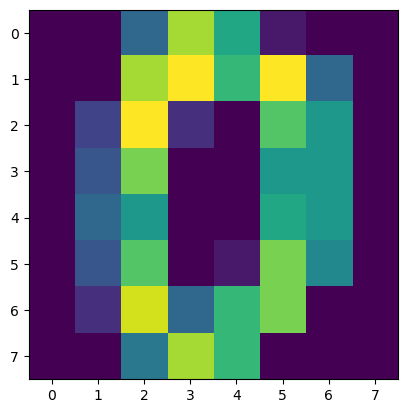

In [27]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.linalg as sla   

# Загрузка данных MNIST
digits = datasets.load_digits()

# Применение SVD
U, S, Vt = sla.svd(digits.data, full_matrices=False)

print("Матрица U:")
print(U)
print("Сингулярные числа (S):")
print(S)
print("Матрица V транспонированная:")
print(Vt)

Матрица U:
[[ 2.09114372e-02 -2.10250887e-03  3.89296445e-02 ...  0.00000000e+00
   0.00000000e+00 -9.92354046e-01]
 [ 2.53199533e-02  1.38656341e-02 -3.77989154e-02 ... -3.43280175e-02
   4.43712676e-02 -2.89891431e-03]
 [ 2.54559261e-02  1.21951237e-02 -1.78272413e-02 ... -1.04087072e-04
   1.91248626e-02 -2.06422290e-03]
 ...
 [ 2.98784403e-02  1.87985701e-02 -1.16134751e-02 ... -5.48675713e-03
   1.63201948e-03 -1.02884326e-03]
 [ 2.67227437e-02 -8.66186959e-03  2.34742370e-02 ... -1.12810748e-03
  -1.43909760e-03  3.65007231e-03]
 [ 2.93865591e-02 -8.03379300e-04  1.29922129e-02 ...  4.37370391e-05
   3.64571326e-03 -4.73044250e-03]]
Сингулярные числа (S):
[2.19311934e+03 5.66996772e+02 5.42004933e+02 5.04151698e+02
 4.25592965e+02 3.53218247e+02 3.20375836e+02 3.02074410e+02
 2.79556965e+02 2.68519447e+02 2.28655772e+02 2.24164792e+02
 2.07596162e+02 1.97012043e+02 1.85787554e+02 1.74752715e+02
 1.70848098e+02 1.65449993e+02 1.48269096e+02 1.44935033e+02
 1.39338512e+02 1.3135359

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

C:\Users\Вадим\AppData\Local\Temp\ipykernel_16036\2175762821.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(projected_data[indices, 0], projected_data[indices, 1],


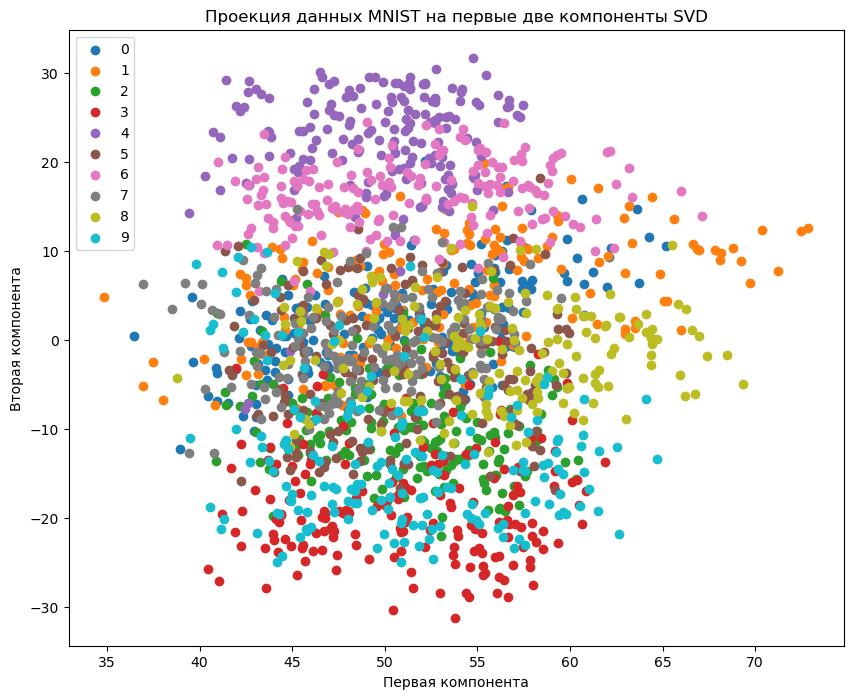

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
projected_data = U[:, :2] * S[:2]  # Умножаем на S для учета сингулярных значений

# Создание цветовой палитры для цифр
colors = plt.colormaps.get_cmap('tab10')

# Визуализация
plt.figure(figsize=(10, 8))   
for i in range(10):
    # Выбираем точки, соответствующие цифре i
    indices = digits.target == i
    plt.scatter(projected_data[indices, 0], projected_data[indices, 1], 
                c=colors(i), label=str(i))

plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.title('Проекция данных MNIST на первые две компоненты SVD')
plt.legend()
plt.show()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

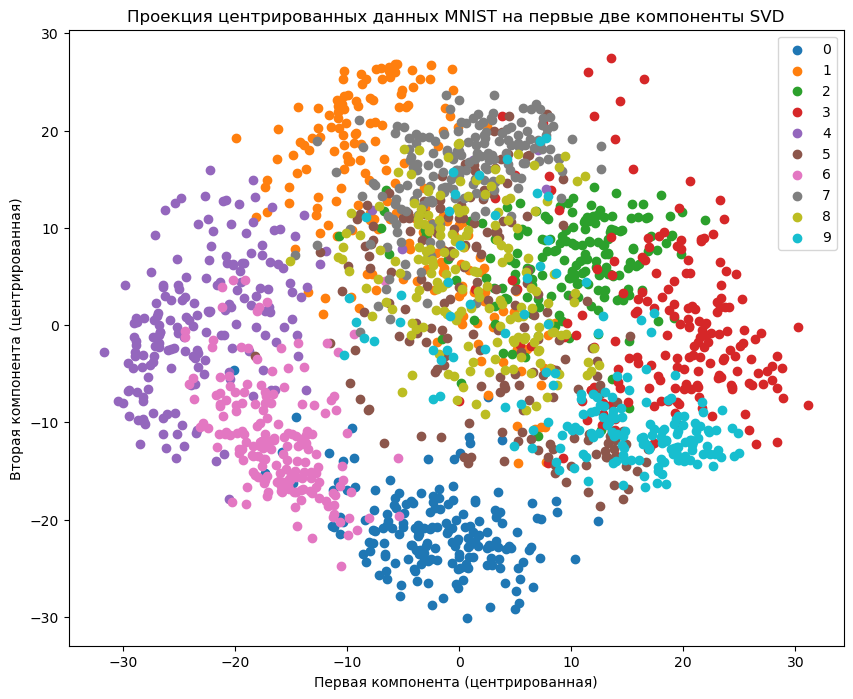

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
centered_data = digits.data - digits.data.mean(axis=0)

# SVD для центрированных данных
U, S, Vt = sla.svd(centered_data, full_matrices=False)

# Проецирование центрированных данных на первые две компоненты
projected_centered_data = U[:, :2] * S[:2]

# Создание цветовой палитры для цифр
colors = plt.colormaps.get_cmap('tab10')

plt.figure(figsize=(10, 8))
for i in range(10):
    indices = digits.target == i
    plt.scatter(projected_centered_data[indices, 0], 
                projected_centered_data[indices, 1],
                color=colors(i), label=str(i))

plt.xlabel('Первая компонента (центрированная)')
plt.ylabel('Вторая компонента (центрированная)')
plt.title('Проекция центрированных данных MNIST на первые две компоненты SVD')
plt.legend()
plt.show()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Сравнивая две визуализации (проекция исходных данных и центрированных данных на первые две компоненты SVD), можно заметить, что вторая визуализация (с центрированными данными) обеспечивает более четкое разделение классов (цифр).

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

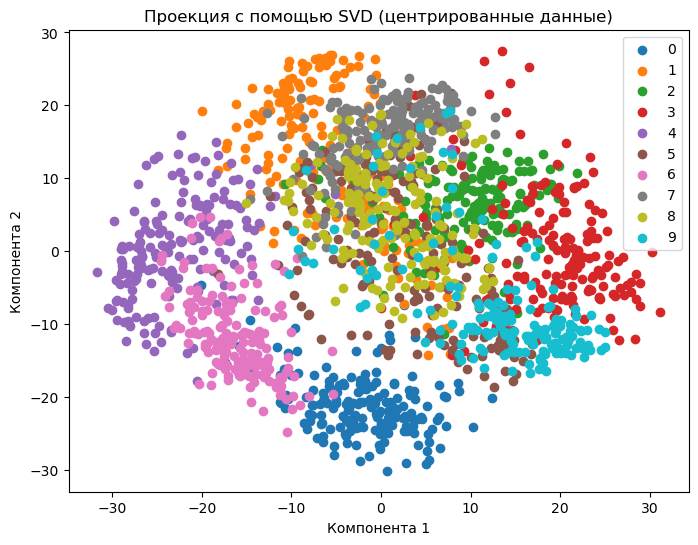

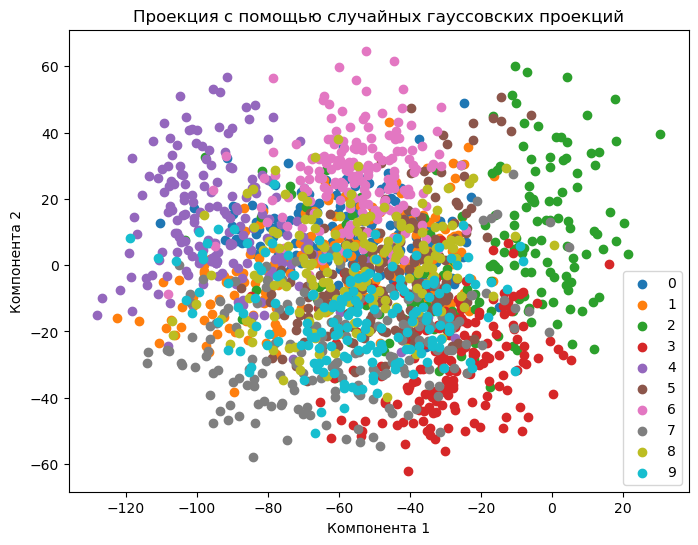

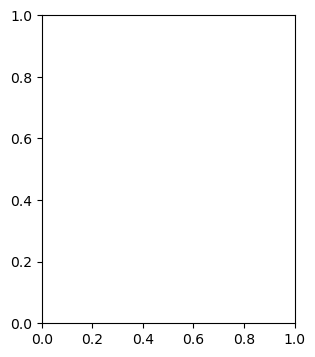

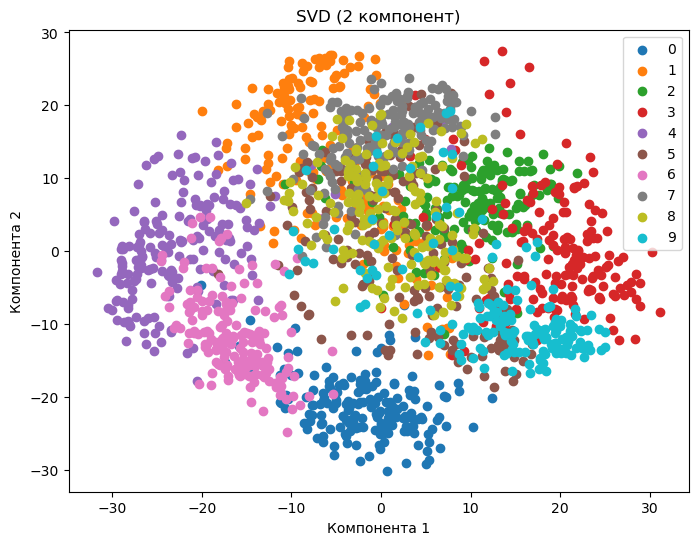

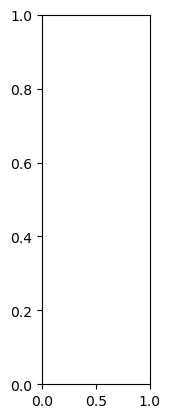

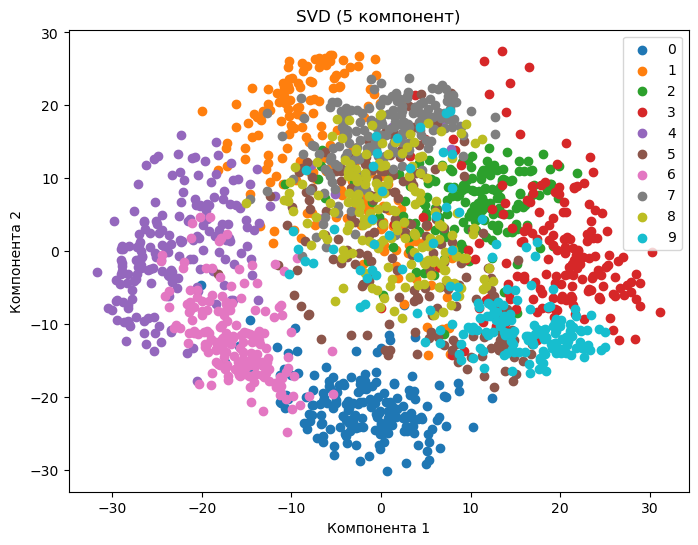

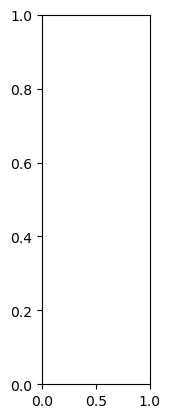

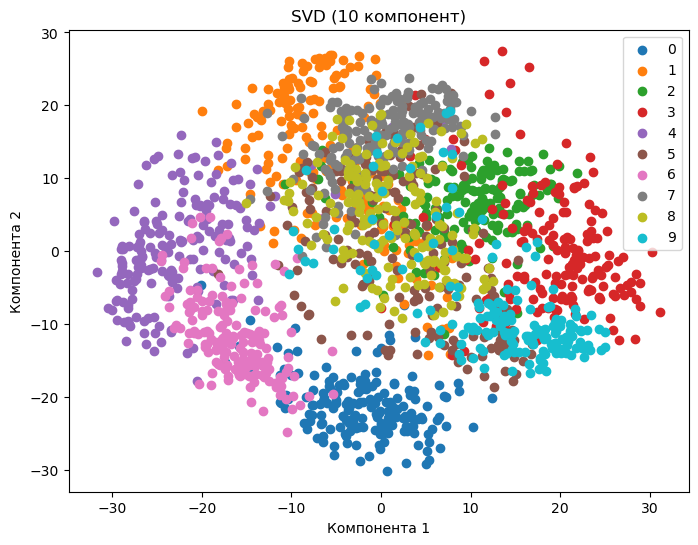

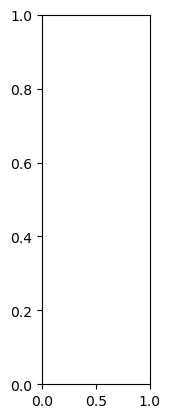

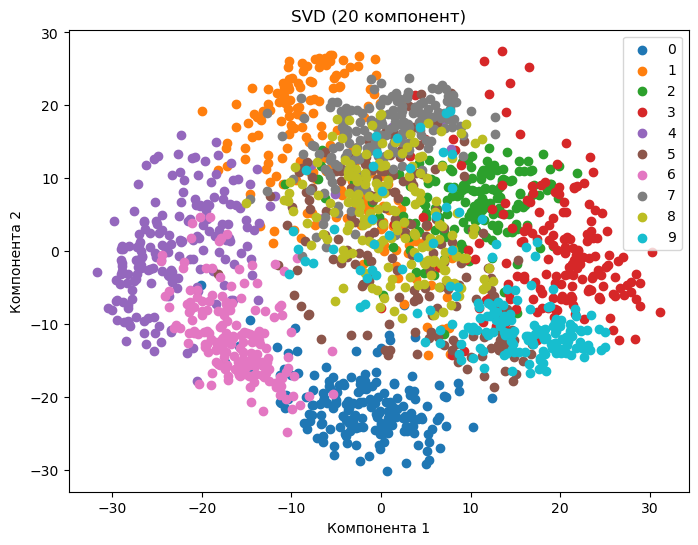

<Figure size 640x480 with 0 Axes>

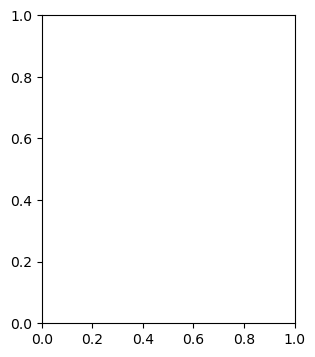

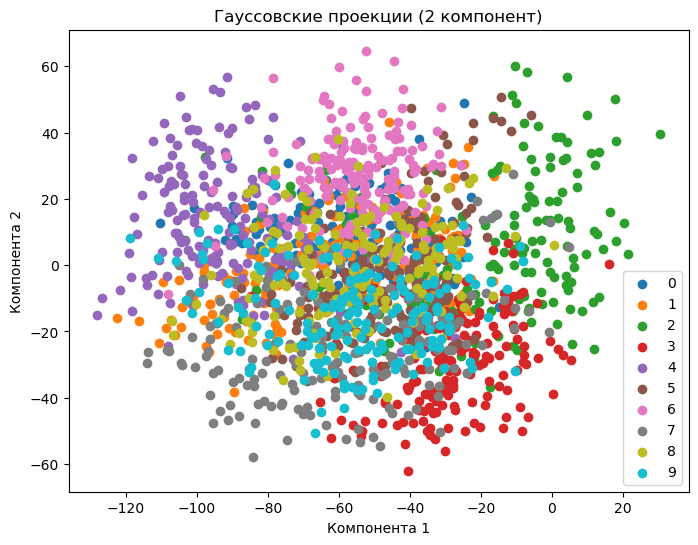

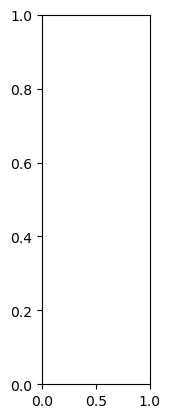

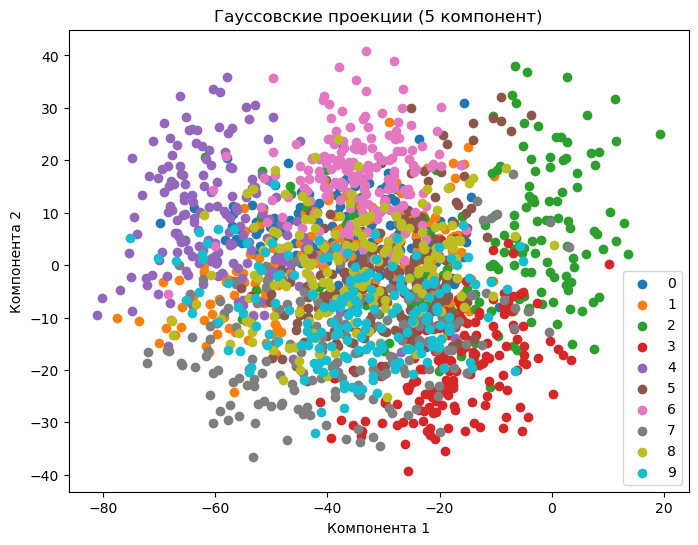

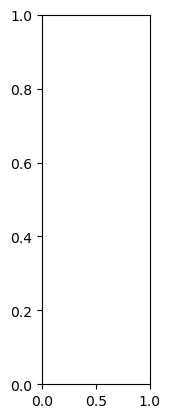

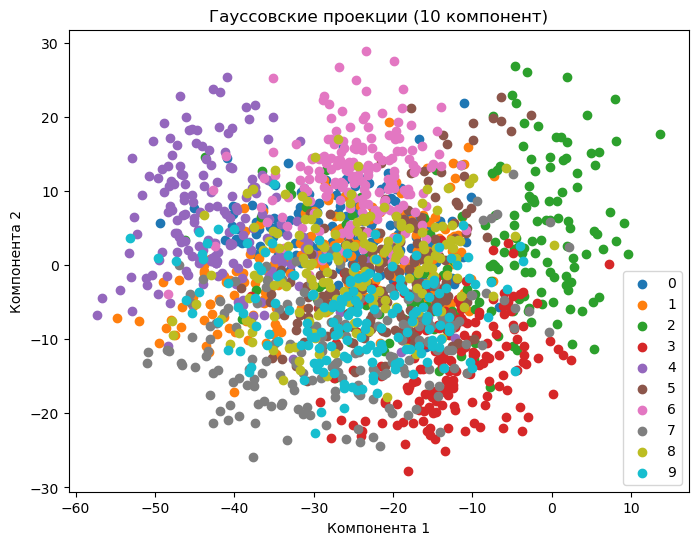

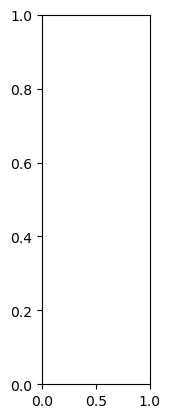

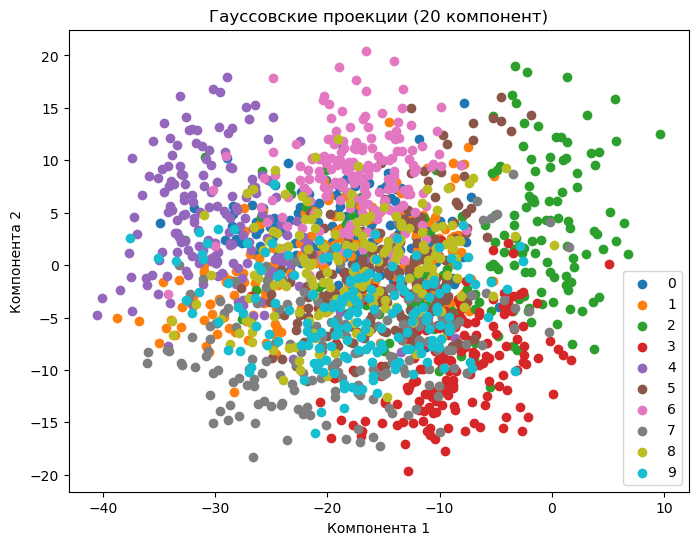

<Figure size 640x480 with 0 Axes>

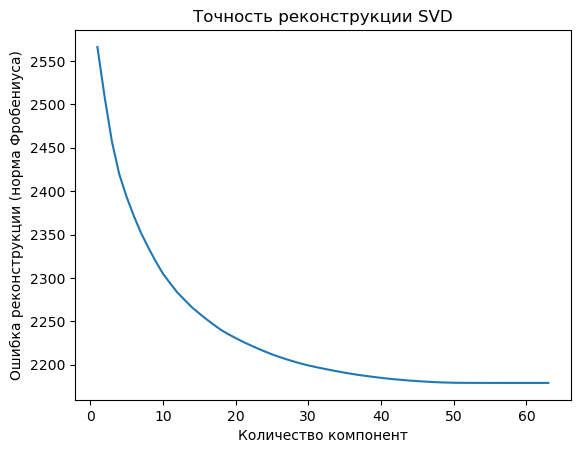

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.random_projection import GaussianRandomProjection
import scipy.linalg as sla
import numpy as np

# Загрузка данных MNIST
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Функция для визуализации проекции данных (исправлена)
def plot_projection(X_proj, title):
    plt.figure(figsize=(8, 6))
    colors = plt.colormaps.get_cmap('tab10')
    for i in range(10):
        indices = y == i
        plt.scatter(X_proj[indices, 0], X_proj[indices, 1], color=colors(i), label=str(i))
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.title(title)
    plt.legend()
    plt.show()

# 1. SVD (центрированные данные, 2 компоненты для визуализации)
U, S, Vt = sla.svd(X - X.mean(axis=0), full_matrices=False)
X_svd = U[:, :2] @ np.diag(S[:2])  
plot_projection(X_svd, 'Проекция с помощью SVD (центрированные данные)')

# 2. Случайные гауссовские проекции (2 компоненты)
grp = GaussianRandomProjection(n_components=2, random_state=42)
X_grp = grp.fit_transform(X)
plot_projection(X_grp, 'Проекция с помощью случайных гауссовских проекций')

# --- Дополнительные эксперименты ---

# 3. Влияние количества компонент (SVD), визуализация первых двух
components = [2, 5, 10, 20]
plt.figure(figsize=(15, 4))
for i, n_comp in enumerate(components):
    U, S, Vt = sla.svd(X - X.mean(axis=0), full_matrices=False)
    # Проекция на n_comp компонент, затем берем первые 2 для визуализации
    X_svd_n = (U[:, :n_comp] @ np.diag(S[:n_comp]))[:, :2] 
    plt.subplot(1, len(components), i + 1)
    plot_projection(X_svd_n, f'SVD ({n_comp} компонент)') 
plt.tight_layout()
plt.show()

# 4. Влияние количества компонент (Гауссовские проекции), визуализация первых двух
components = [2, 5, 10, 20]
plt.figure(figsize=(15, 4))
for i, n_comp in enumerate(components):
    grp = GaussianRandomProjection(n_components=n_comp, random_state=42)
    # Проекция на n_comp компонент, затем берем первые 2 для визуализации
    X_grp_n = grp.fit_transform(X)[:, :2] 
    plt.subplot(1, len(components), i + 1)
    plot_projection(X_grp_n, f'Гауссовские проекции ({n_comp} компонент)')
plt.tight_layout()
plt.show()


# 5. Оценка точности реконструкции (SVD)
reconstruction_errors = []
for n_comp in range(1, 64):
    U, S, Vt = sla.svd(X - X.mean(axis=0), full_matrices=False)
    X_svd_rec = U[:, :n_comp] @ np.diag(S[:n_comp]) @ Vt[:n_comp, :]
    error = np.linalg.norm(X - X_svd_rec)
    reconstruction_errors.append(error)

plt.plot(range(1, 64), reconstruction_errors)
plt.xlabel('Количество компонент')
plt.ylabel('Ошибка реконструкции (норма Фробениуса)')
plt.title('Точность реконструкции SVD')
plt.show()

# Выводы

#1. Влияние масштаба и смещения: В исходных данных различные признаки (пиксели) могут иметь разные средние значения и разбросы
#(дисперсии). Это может привести к тому, что признаки с большими значениями или разбросами будут доминировать при вычислении
#главных компонент, даже если они не несут в себе наиболее важной информации для разделения классов.

#2. Центрирование данных: Вычитание среднего значения из каждого признака приводит все признаки к одному масштабу (среднее значение
#становится равным нулю). Это позволяет алгоритму SVD фокусироваться на взаимосвязях между признаками, а не на их абсолютных
#значениях.

#3. Улучшенное разделение классов: В результате центрирования данных главные компоненты (и проекция на плоскость первых двух
#компонент) лучше отражают структуру данных, связанную с разделением на классы, что приводит к более четкой визуализации.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [42]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Вадим\AppData\Local\Temp\ipykernel_16036\503124060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
C:\Users\Вадим\AppData\Local\Temp\ipykernel_16036\503124060.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
C:\U

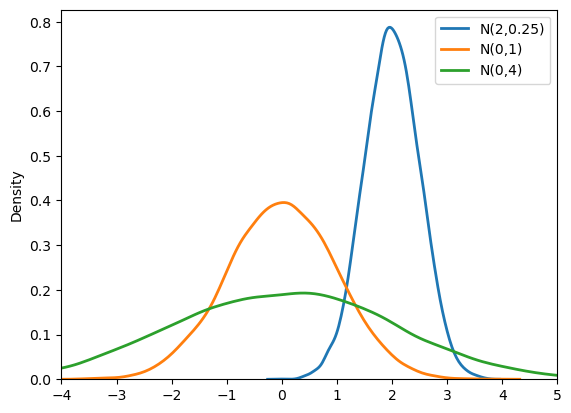

In [43]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

C:\Users\Вадим\AppData\Local\Temp\ipykernel_16036\1902041324.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s, shade=False, color='g')


<Axes: ylabel='Density'>

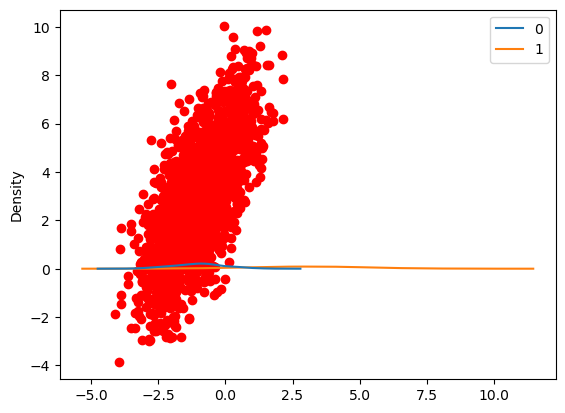

In [44]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

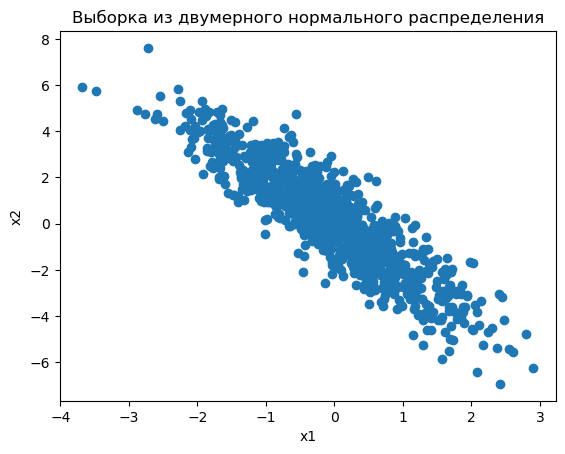

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import numpy as np
import matplotlib.pyplot as plt

# Параметры распределения
mean = np.array([0, 0])
cov = np.array([[1, -2],
               [-2, 5]])

# Генерация выборки
samples = np.random.multivariate_normal(mean, cov, size=1000)

# Визуализация (опционально)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Выборка из двумерного нормального распределения')
plt.show()

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

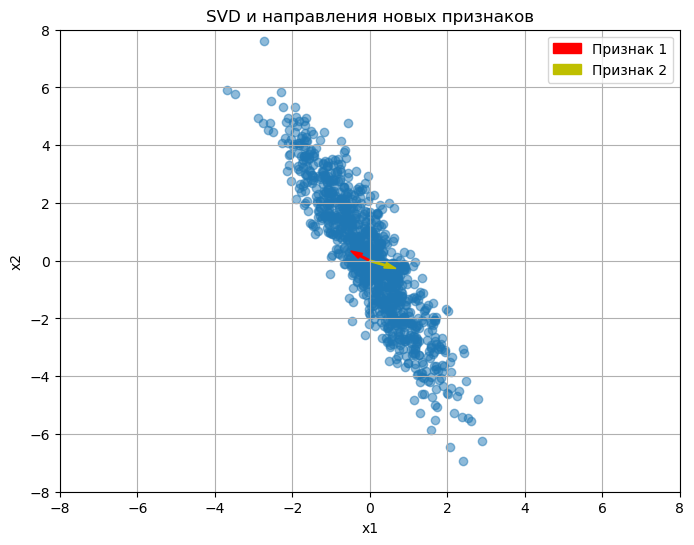

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

U, S, Vt = svd(samples.T)  

# Направления новых признаков (первые два столбца Vt)
new_features_directions = Vt[:2]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)

# Рисуем стрелки для направлений новых признаков
plt.arrow(0, 0, 5*new_features_directions[0, 0], 5*new_features_directions[0, 1], 
          color='r', width=0.05, head_width=0.2, label='Признак 1')
plt.arrow(0, 0, 5*new_features_directions[1, 0], 5*new_features_directions[1, 1], 
          color='y', width=0.05, head_width=0.2, label='Признак 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVD и направления новых признаков')
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.legend()
plt.grid(True)
plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
## Приведение ковариационной матрицы к главным осям 

**1. Исходная ковариационная матрица:**
Σ = | 1 -2 |
|-2 5 |
**2. Нахождение собственных значений:**

Решаем характеристическое уравнение:
det(Σ - λI) = 0
| 1-λ -2 | = 0
|-2 5-λ |
`(1 - λ)(5 - λ) - (-2)(-2) = 0`

`λ² - 6λ + 1 = 0`

Решая квадратное уравнение, получаем собственные значения:
λ₁ = 3 + 2√2
λ₂ = 3 - 2√2
**3. Нахождение собственных векторов:**

* **Для λ₁ = 3 + 2√2:**

   Решаем систему уравнений:
   (Σ - λ₁I)v₁ = 0
   | -2-2√2 -2 | | x | = 0
| -2 2-2√2| | y |
Получаем собственный вектор (с точностью до умножения на константу):
v₁ = (1, -1-√2)ᵀ
* **Для λ₂ = 3 - 2√2:**

Аналогично, решаем систему уравнений:
(Σ - λ₂I)v₂ = 0
Получаем собственный вектор:
v₂ = (1, -1+√2)ᵀ
**4. Нормировка собственных векторов:**
u₁ = v₁ / ||v₁|| = (1/√(4+2√2), (-1-√2)/√(4+2√2))ᵀ
u₂ = v₂ / ||v₂|| = (1/√(4-2√2), (-1+√2)/√(4-2√2))ᵀ
**5. Матрица преобразования:**

Матрица, столбцами которой являются нормированные собственные векторы, преобразует исходную систему координат в систему главных осей:
U = [u₁ u₂] =
| 1/√(4+2√2) 1/√(4-2√2) |
|(-1-√2)/√(4+2√2) (-1+√2)/√(4-2√2)|
**6. Сравнение с визуализацией:**

* Направления собственных векторов `u₁` и `u₂`  соответствуют направлениям главных осей эллипсоида, полученного при визуализации данных.
* Собственные значения `λ₁` и `λ₂`  характеризуют разброс данных вдоль соответствующих главных осей.

**Вывод:**

Приведение ковариационной матрицы к главным осям подтверждает, что SVD правильно находит направления максимальной дисперсии данных, которые совпадают с полуосями эллипсоида, образованного точками выборки из многомерного нормального распределения.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

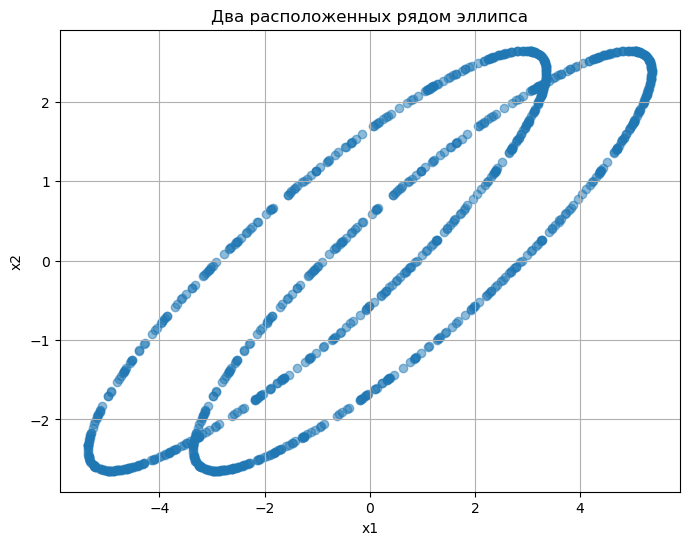

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt

# Параметры эллипсов
center1 = np.array([-1, 0])
center2 = np.array([1, 0])
scale_x = 5  # Масштаб по оси x
scale_y = 1  # Масштаб по оси y
rotation_angle = np.radians(30)  # Угол поворота в радианах

# Генерация точек для первого эллипса
n_points = 500
theta = np.random.rand(n_points) * 2 * np.pi
ellipse1_x = scale_x * np.cos(theta)
ellipse1_y = scale_y * np.sin(theta)

# Поворот первого эллипса
ellipse1_rotated_x = ellipse1_x * np.cos(rotation_angle) - ellipse1_y * np.sin(rotation_angle)
ellipse1_rotated_y = ellipse1_x * np.sin(rotation_angle) + ellipse1_y * np.cos(rotation_angle)

# Сдвиг первого эллипса к центру
ellipse1_final_x = ellipse1_rotated_x + center1[0]
ellipse1_final_y = ellipse1_rotated_y + center1[1]

# Генерация точек для второго эллипса (аналогично первому)
ellipse2_x = scale_x * np.cos(theta)
ellipse2_y = scale_y * np.sin(theta)
ellipse2_rotated_x = ellipse2_x * np.cos(rotation_angle) - ellipse2_y * np.sin(rotation_angle)
ellipse2_rotated_y = ellipse2_x * np.sin(rotation_angle) + ellipse2_y * np.cos(rotation_angle)
ellipse2_final_x = ellipse2_rotated_x + center2[0]
ellipse2_final_y = ellipse2_rotated_y + center2[1]

# Объединение данных для двух эллипсов
data = np.concatenate((np.vstack((ellipse1_final_x, ellipse1_final_y)).T,
                       np.vstack((ellipse2_final_x, ellipse2_final_y)).T))

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Два расположенных рядом эллипса')
plt.grid(True)
plt.show()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

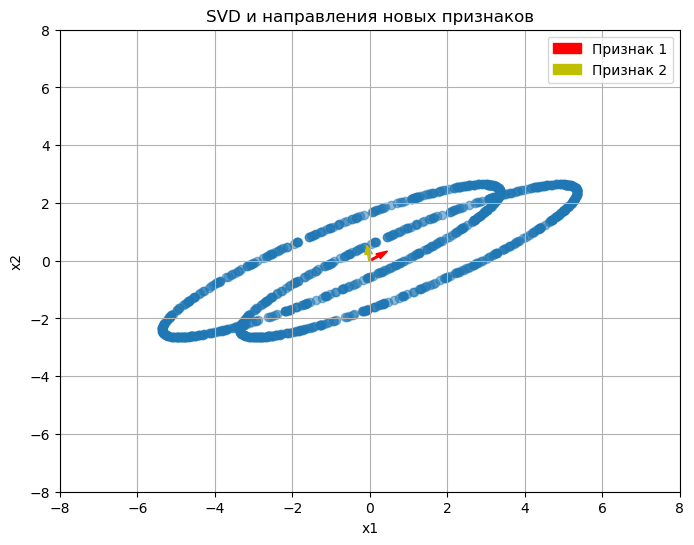

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# SVD-разложение
U, S, Vt = svd(data.T)  # Транспонируем data, т.к. объекты в строках

# Направления новых признаков (первые два столбца Vt)
new_features_directions = Vt[:2]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)

# Рисуем стрелки для направлений новых признаков
plt.arrow(0, 0, 5*new_features_directions[0, 0], 5*new_features_directions[0, 1], 
          color='r', width=0.05, head_width=0.2, label='Признак 1')
plt.arrow(0, 0, 5*new_features_directions[1, 0], 5*new_features_directions[1, 1], 
          color='y', width=0.05, head_width=0.2, label='Признак 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVD и направления новых признаков')
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.legend()
plt.grid(True)
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Первый признак (красная стрелка) направлен вдоль облака точек, объединяющего оба эллипса. Это означает, что он отражает общую дисперсию данных, но не видит различия между двумя кластерами. Проекция данных на этот признак "схлопнет" оба эллипса в одну линию, делая их неразличимыми.
Второй признак (зеленая стрелка) ортогонален первому и направлен перпендикулярно "общему направлению" эллипсов. Он отражает "толщину" эллипсов, которая в данном случае гораздо меньше их длины. Проекция данных на этот признак не даст четкого разделения, так как точки из обоих кластеров будут сильно перекрываться.
SVD ищет направления максимальной дисперсии данных. В данном случае, общая дисперсия обусловлена в первую очередь длиной эллипсов, а не разностью их расположения. Поэтому SVD не "видит" структуру данных, которая нас интересует.

In [51]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

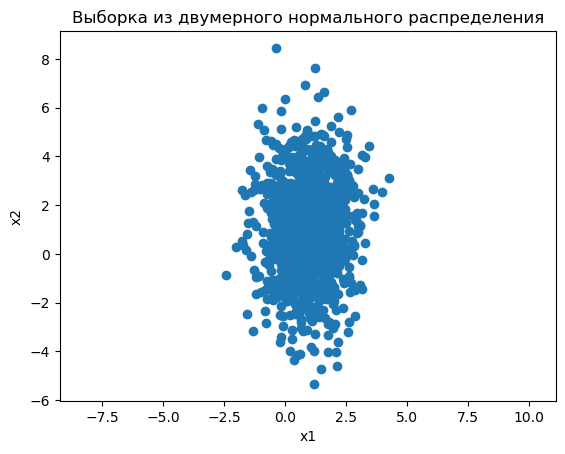

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt

# Параметры распределения
mean = np.array([1, 1])
cov = np.array([[1, 0],
               [0, 4]])

# Генерация выборки
samples = np.random.multivariate_normal(mean, cov, size=1000)

# Визуализация (опционально)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Выборка из двумерного нормального распределения')
plt.axis('equal')  # Добавляем для сохранения пропорций осей
plt.show()

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Можно определить, что "интересными" направлениями будут оси координат, то есть (1, 0) и (0, 1).

Объяснение:
Ковариационная матрица диагональна. Это означает, что ковариация между признаками (x1 и x2) равна нулю, то есть признаки некоррелированы.Элемент Σ₁₁ = 10 представляет собой дисперсию признака x1.Элемент Σ₂₂ = 4 представляет собой дисперсию признака x2. Большая дисперсия по x1 (10) означает, что данные сильно разбросаны вдоль оси x. Меньшая дисперсия по x2 (4) указывает на меньший разброс данных вдоль оси y.

Вывод:
Так как ковариационная матрица диагональна, оси координат совпадают с главными компонентами данных. Именно эти направления (оси x и y) будут соответствовать направлениям полуосей эллипса, причём длина полуосей будет пропорциональна корню квадратному из дисперсии (стандартному отклонению) вдоль соответствующей оси.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

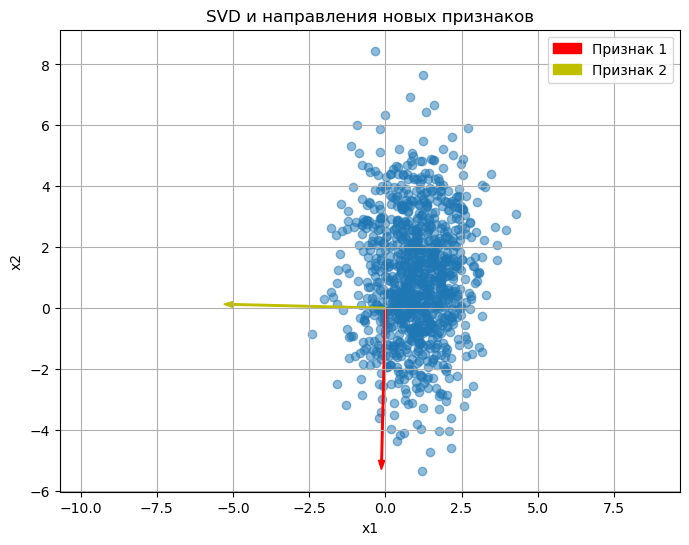

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# ... (генерация выборки samples из предыдущего шага)

# SVD-разложение
U, S, Vt = svd(samples - np.mean(samples, axis=0), full_matrices=False) #центрируем данные

# Направления новых признаков (первые два столбца Vt)
new_features_directions = Vt[:2]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)

# Рисуем стрелки для направлений новых признаков
plt.arrow(0, 0, 5 * new_features_directions[0, 0], 5 * new_features_directions[0, 1],
          color='r', width=0.05, head_width=0.2, label='Признак 1')
plt.arrow(0, 0, 5 * new_features_directions[1, 0], 5 * new_features_directions[1, 1],
          color='y', width=0.05, head_width=0.2, label='Признак 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVD и направления новых признаков')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
В чем проблема:
SVD не учитывает кластерную структуру: SVD оптимизируется для поиска направлений с наибольшим разбросом данных. В нашем случае данные имеют большой разброс вдоль направления, которое объединяет оба эллипса, и SVD не может найти разделяющую ось.

Как исправить:

1. Можно попробовать применить нелинейное преобразование к данным, чтобы сделать их более разделимыми. Например, можно использовать полиномиальные преобразования или преобразование радиальных базисных функций (RBF).
2. Изменение масштаба данных (например, стандартизация) может помочь SVD лучше учитывать разные дисперсии признаков.